# 크롤링 데이터 csv 파일 전처리

## module load

In [1]:
import re
import os
import kss
import json
import random
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
from konlpy.tag import Mecab
m = Mecab()

## 크롤링 데이터 불러오기

In [2]:
crawled = pd.read_csv('../book_crawling/크롤링_전부_중복제거_210531.csv', low_memory=False, index_col=0)

In [5]:
crawled.fillna('', inplace=True)
crawled = crawled.replace('접어보기', '').replace('펼쳐보기', '')
crawled

,isbn,제목,저자,역자,별점,리뷰,카테고리,책소개,저자소개,추천사,목차,책속으로,출판사리뷰,판매지수,북소믈리에,출판일,출판사
0,9788942518999,전기안전공학,김두현 외,,,0 (반디앤루니스),"['대학교재 > 공학계열', '자연과학/공학 > 기술공학 > 전기/전자공학',...",,,,PART01 총론\n \nChapter1 안전공학의 개념 \nChapter2 전기적...,,,,,,
1,9788942518883,정역학,국승규,,,0 (반디앤루니스),"['자연과학/공학 > 기계/역학/항공공학 > 유체역학', '대학교재 > 공학계...",,,,제1장 서론 \n1.1 개요 \n1.2 기본개념 및 원리 \n1.3 단위계 \n1....,,,,,,
2,9788942518838,방제연공학,추병길 외,,,0 (반디앤루니스),"['자연과학/공학 > 기술공학 > 소방학 > 소방/방재이론', '대학교재 >...",,,,제1장 총론\n \n1.1 연기의 위험성 \n1.2 방제연개론 \n1.3 외국의 방...,,,,,,
3,9788942518890,Auto CAD 이해와 활용,"하헌우, 강찬석, 소수현 외",,,0 (반디앤루니스),"['대학교재 > 공학계열', '컴퓨터/IT', '컴퓨터/IT > 컴퓨터그래픽 ...",,,,CHAPTER 1. Auto CAD의 특징 및 설치 방법\n\nCHAPTER 2. ...,,,,,,
4,9788960098183,적성 캐스트 두산 DCAT 이공계,타임 적성검사연구소,,,0 (반디앤루니스),['대기업/공기업/면접 > 직무적성검사'],,,,PART 1 기초적성검사\n 01 언어논리성 \n02 수리자료분석 \n03 공...,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984653,9788992654159,ADHD 아동,김유숙 외,,,1 (반디앤루니스),"['대학교재', '인문/교양/철학 > 교육학 > 특수교육']",,"김유숙\n일본 도쿄(東京) 대학교 의학부에서 임상심리를 전공했으나, 한 개인을 둘러...",,서문\n\nPart 1 ADHD란 무엇인가\nPart 2 ADHD를 어떻게 다룰 것...,,,,,,이너북스
984654,9788994129013,붕어낚시 100문 1000답,낚시춘추편집부,,,0 (반디앤루니스),['여행/취미/레저 > 취미 > 낚시'],,,,목차\n위로\n \n \n\n \n제1장 붕어와 붕어낚시 붕어낚시의 정의와 기원 /...,,,,,,예조원
984655,9788994129136,루어낚시 첫걸음 - 바다편,조홍식,,,0 (반디앤루니스),['여행/취미/레저 > 취미 > 낚시'],,조홍식\n루어낚시인으로 유명한 이학박사이다. 서울 출신으로 경희대학교 및 동 대학원...,,1 첫걸음에 앞서 \n다이내믹한 바다 루어낚시의 매력 \n바다 루어낚시의 대상어종들...,,,,,,예조원
984656,9788994129068,월척 쉽게 낚는 책,허만갑,,,0 (반디앤루니스),['여행/취미/레저 > 취미 > 낚시'],,허만갑\n경상대학교 사회교육과 졸업. 사범대를 나왔으나 낚시가 좋아 교사의 길을 포...,,Part 1 왜 가장자리인가?-붕어의 먹이는 물가에 있다\nPart 2 최선의 낚시...,,,,,,예조원


### 제목 전처리

In [6]:
def title_proc(title):
    title = re.sub('\\n?\[([^\]]+)\]', '', title)
    title = re.sub('\n\n\n바인딩 & 에디션 안내 이동', '', title)
    title = re.sub('\\n?소득공제', '', title)
    title = re.sub('\[.*판.*\]', '', title)
    title = re.sub('외서\n', '', title)
    title = re.sub('직수입양서\n', '', title)
    title = re.sub('eBook\n', '', title, flags=re.IGNORECASE)
    title = re.sub('DVD\n', '', title, flags=re.IGNORECASE)
    title = re.sub('\(.*CD.*\)', '', title, flags=re.IGNORECASE)
    title = re.sub('\(.*Disc.*\)', '', title, flags=re.IGNORECASE)
    title = re.sub('\(.*TAPE.*\)', '', title, flags=re.IGNORECASE)
    title = re.sub('\(.*권.*\)', '', title)
    title = re.sub('\(.*판.*\)', '', title)
    title = re.sub('\(.*문제집.*\)', '', title)
    if '개정판' in title:
        title = re.sub('\[.*\]', '개정판', title)
    title = title.replace('\n', ' - ')
    return title

### 책소개

In [7]:
def book_intro_proc(book):
    book = re.sub('</?br?/?>', ' ', book)
    book = re.sub('\n{3,}', '\n\n', book)
    book = re.sub('\s{3,}', ' ', book)
    book = re.sub('[·☞…━→\*=<>『』「」《》\(\)\[\]ⓒ©○●◇◆□■△▲▶▷◀◁/~#&\+á?\-\|\:\;\!\-\,\_\~\$\'\"‘’“”\'\"]', '', book)
    book = book.replace('접어보기', '')
    return book

### 책속으로

In [8]:
def inside_book_proc(book):
    book = re.sub('</?br?/?>', ' ', book)
    book = re.sub('\n{3,}', '\n', book)
    book = re.sub('\s{3,}', ' ', book)
    book = re.sub('\([^\)]+\)', '', book)
    book = re.sub('.*中.*\n?', '', book)
    book = re.sub('.*중에서.*\n', '', book)
    book = re.sub('-.*\n?', '', book)
    book = re.sub('_.*\n?', '', book)
    book = re.sub('\d{1,3}쪽\n?', '', book)
    book = re.sub('p.{1,2}\d{1,3}', '', book)
    book = re.sub('\d{1,3}p', '', book)
    book = re.sub('\d\n', '', book)
    book = book.replace('접어보기', '')
    book = book.replace('펼쳐보기', '')
    book = re.sub('[·☞…━→\*=<>『』「」<>《》\(\)\[\]ⓒ©○●◇◆□■△▲▶▷◀◁/~#&\+á?\-\|\:\;\!\-\,\_\~\$\'\"‘’“”\'\"]', '', book)
    return book

### 출판사리뷰

In [9]:
def pub_review_proc(book):
#     book = re.sub('</?br?/?>', ' ', book)
    book = re.sub('-.*\n?', '', book)
    book = re.sub('.*중에서.*\n', '\n\n', book)
    book = re.sub('.*소개\n', '', book)
    book = re.sub('\s{3,}', ' ', book)
    book = re.sub('\n{3,}', '\n', book)
    book = re.sub('\.{3,}', '.', book)
    book = re.sub('출판사\s?(리뷰|서평)\s?\d?\n?', '', book)
    book = re.sub('(추천사|추천평|.*소개|줄거리)\n', '', book)
    book = book.replace('접어보기', '')
    book = book.replace('펼쳐보기', '')
    book = re.sub('\([^\)]+\)', '', book)
    book = re.sub('[·•ㆍ⋅☞…━→l\*=<>『』「」<>〈〉≪≫《》\(\)\[\]ⓒ©※☆★♡♥○●◇◆◈□■▣△▲▶▷◀◁^/~#&\+á?\-\|\:\;\!\-\,\_\~\$\'\"‘’“”\'\"]', '', book)
    return book

### 추천사

In [10]:
recos = crawled.loc[:, ['isbn', '추천사']]

In [11]:
reco_list = recos.추천사.tolist()
reco_notnull = list(filter(lambda x: x != '없음' or x != '없음없음', reco_list))

## Dataframe 전처리 함수들

In [12]:
def title_proc(title):
    title = re.sub('\\n?\[([^\]]+)\]', '', title)
    title = re.sub('\n\n\n바인딩 & 에디션 안내 이동', '', title)
    title = re.sub('\\n?소득공제', '', title)
    title = re.sub('\[.*판.*\]', '', title)
    title = re.sub('외서\n', '', title)
    title = re.sub('직수입양서\n', '', title)
    title = re.sub('eBook\n', '', title, flags=re.IGNORECASE)
    title = re.sub('DVD\n', '', title, flags=re.IGNORECASE)
    title = re.sub('\(.*CD.*\)', '', title, flags=re.IGNORECASE)
    title = re.sub('\(.*Disc.*\)', '', title, flags=re.IGNORECASE)
    title = re.sub('\(.*TAPE.*\)', '', title, flags=re.IGNORECASE)
    title = re.sub('\(.*권.*\)', '', title)
    title = re.sub('\(.*판.*\)', '', title)
    if '개정판' in title:
        title = re.sub('\[.*\]', '개정판', title)
    title = title.replace('\n', ' - ')
    return title

In [13]:
def book_intro_proc(book):
    book = re.sub('</?br?/?>', ' ', book)
    book = re.sub('\n{3,}', '\n\n', book)
    book = re.sub('\s{3,}', ' ', book)
    book = re.sub('[·☞…━→\*=<>『』「」《》\(\)\[\]ⓒ©○●◇◆□■△▲▶▷◀◁/~#&\+á?\-\|\:\;\!\-\,\_\~\$\'\"‘’“”\'\"]', '', book)
    book = book.replace('접어보기', '')
    return book

In [14]:
def inside_book_proc(book):
    book = re.sub('</?br?/?>', ' ', book)
    book = re.sub('\n{3,}', '\n', book)
    book = re.sub('\s{3,}', ' ', book)
    book = re.sub('\([^\)]+\)', '', book)
    book = re.sub('.*中.*\n?', '', book)
    book = re.sub('.*중에서.*\n', '', book)
    book = re.sub('-.*\n?', '', book)
    book = re.sub('_.*\n?', '', book)
    book = re.sub('\d{1,3}쪽\n?', '', book)
    book = re.sub('p.{1,2}\d{1,3}', '', book)
    book = re.sub('\d{1,3}p', '', book)
    book = re.sub('\d\n', '', book)
    book = book.replace('접어보기', '')
    book = book.replace('펼쳐보기', '')
    book = re.sub('[·☞…━→\*=<>『』「」<>《》\(\)\[\]ⓒ©○●◇◆□■△▲▶▷◀◁/~#&\+á?\-\|\:\;\!\-\,\_\~\$\'\"‘’“”\'\"]', '', book)
    return book

In [15]:
def pub_review_proc(book):
#     book = re.sub('</?br?/?>', ' ', book)
    book = re.sub('-.*\n?', '', book)
    book = re.sub('.*중에서.*\n', '\n\n', book)
    book = re.sub('.*소개\n', '', book)
    book = re.sub('\s{3,}', ' ', book)
    book = re.sub('\n{3,}', '\n', book)
    book = re.sub('\.{3,}', '.', book)
    book = re.sub('출판사\s?(리뷰|서평)\s?\d?\n?', '', book)
    book = re.sub('(추천사|추천평|.*소개|줄거리)\n', '', book)
    book = book.replace('접어보기', '')
    book = book.replace('펼쳐보기', '')
    book = re.sub('\([^\)]+\)', '', book)
    book = re.sub('[·•ㆍ⋅☞…━→l\*=<>『』「」<>〈〉≪≫《》\(\)\[\]ⓒ©※☆★♡♥○●◇◆◈□■▣△▲▶▷◀◁^/~#&\+á?\-\|\:\;\!\-\,\_\~\$\'\"‘’“”\'\"]', '', book)
    return book

## 각 열 별로 함수 적용한 후 저장

In [16]:
crawled.제목 = crawled.제목.apply(title_proc)
print('제목')

제목


In [17]:
crawled.책소개 = crawled.책소개.apply(book_intro_proc)
print('책소개')

책소개


In [18]:
crawled.책속으로 = crawled.책속으로.apply(inside_book_proc)
print('책속으로')

책속으로


In [19]:
crawled.출판사리뷰 = crawled.출판사리뷰.apply(pub_review_proc)
print('출판사리뷰')

출판사리뷰


In [20]:
crawled

,isbn,제목,저자,역자,별점,리뷰,카테고리,책소개,저자소개,추천사,목차,책속으로,출판사리뷰,판매지수,북소믈리에,출판일,출판사
0,9788942518999,전기안전공학,김두현 외,,,0 (반디앤루니스),"['대학교재 > 공학계열', '자연과학/공학 > 기술공학 > 전기/전자공학',...",,,,PART01 총론\n \nChapter1 안전공학의 개념 \nChapter2 전기적...,,,,,,
1,9788942518883,정역학,국승규,,,0 (반디앤루니스),"['자연과학/공학 > 기계/역학/항공공학 > 유체역학', '대학교재 > 공학계...",,,,제1장 서론 \n1.1 개요 \n1.2 기본개념 및 원리 \n1.3 단위계 \n1....,,,,,,
2,9788942518838,방제연공학,추병길 외,,,0 (반디앤루니스),"['자연과학/공학 > 기술공학 > 소방학 > 소방/방재이론', '대학교재 >...",,,,제1장 총론\n \n1.1 연기의 위험성 \n1.2 방제연개론 \n1.3 외국의 방...,,,,,,
3,9788942518890,Auto CAD 이해와 활용,"하헌우, 강찬석, 소수현 외",,,0 (반디앤루니스),"['대학교재 > 공학계열', '컴퓨터/IT', '컴퓨터/IT > 컴퓨터그래픽 ...",,,,CHAPTER 1. Auto CAD의 특징 및 설치 방법\n\nCHAPTER 2. ...,,,,,,
4,9788960098183,적성 캐스트 두산 DCAT 이공계,타임 적성검사연구소,,,0 (반디앤루니스),['대기업/공기업/면접 > 직무적성검사'],,,,PART 1 기초적성검사\n 01 언어논리성 \n02 수리자료분석 \n03 공...,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984653,9788992654159,ADHD 아동,김유숙 외,,,1 (반디앤루니스),"['대학교재', '인문/교양/철학 > 교육학 > 특수교육']",,"김유숙\n일본 도쿄(東京) 대학교 의학부에서 임상심리를 전공했으나, 한 개인을 둘러...",,서문\n\nPart 1 ADHD란 무엇인가\nPart 2 ADHD를 어떻게 다룰 것...,,,,,,이너북스
984654,9788994129013,붕어낚시 100문 1000답,낚시춘추편집부,,,0 (반디앤루니스),['여행/취미/레저 > 취미 > 낚시'],,,,목차\n위로\n \n \n\n \n제1장 붕어와 붕어낚시 붕어낚시의 정의와 기원 /...,,,,,,예조원
984655,9788994129136,루어낚시 첫걸음 - 바다편,조홍식,,,0 (반디앤루니스),['여행/취미/레저 > 취미 > 낚시'],,조홍식\n루어낚시인으로 유명한 이학박사이다. 서울 출신으로 경희대학교 및 동 대학원...,,1 첫걸음에 앞서 \n다이내믹한 바다 루어낚시의 매력 \n바다 루어낚시의 대상어종들...,,,,,,예조원
984656,9788994129068,월척 쉽게 낚는 책,허만갑,,,0 (반디앤루니스),['여행/취미/레저 > 취미 > 낚시'],,허만갑\n경상대학교 사회교육과 졸업. 사범대를 나왔으나 낚시가 좋아 교사의 길을 포...,,Part 1 왜 가장자리인가?-붕어의 먹이는 물가에 있다\nPart 2 최선의 낚시...,,,,,,예조원


In [19]:
crawled.to_csv('./크롤링_전부_중복제거_210527.csv', encoding='utf-8-sig')

# 전처리, 중복제거된 .csv => 내용 텍스트 있는 것만 추려서 .dat

In [3]:
crawled = pd.read_csv('../book_crawling/크롤링_전부_중복제거_210527.csv', 
                      encoding='utf-8-sig', low_memory=False, index_col=0)

In [26]:
with_table = crawled[(crawled.책소개 == '') & (crawled.책속으로 == '') & (crawled.추천사 == '') &
                     (crawled.출판사리뷰 == '') & (crawled.북소믈리에 == '') & (crawled.목차 != '')].copy()
with_table.reset_index(inplace=True)
with_table.drop(['index'], axis=1, inplace=True)
with_table

,isbn,제목,저자,역자,별점,리뷰,카테고리,책소개,저자소개,추천사,목차,책속으로,출판사리뷰,판매지수,북소믈리에,출판일,출판사
0,9788942518999,전기안전공학,김두현 외,,,0 (반디앤루니스),"['대학교재 > 공학계열', '자연과학/공학 > 기술공학 > 전기/전자공학',...",,,,PART01 총론\n \nChapter1 안전공학의 개념 \nChapter2 전기적...,,,,,,
1,9788942518883,정역학,국승규,,,0 (반디앤루니스),"['자연과학/공학 > 기계/역학/항공공학 > 유체역학', '대학교재 > 공학계...",,,,제1장 서론 \n1.1 개요 \n1.2 기본개념 및 원리 \n1.3 단위계 \n1....,,,,,,
2,9788942518838,방제연공학,추병길 외,,,0 (반디앤루니스),"['자연과학/공학 > 기술공학 > 소방학 > 소방/방재이론', '대학교재 >...",,,,제1장 총론\n \n1.1 연기의 위험성 \n1.2 방제연개론 \n1.3 외국의 방...,,,,,,
3,9788942518890,Auto CAD 이해와 활용,"하헌우, 강찬석, 소수현 외",,,0 (반디앤루니스),"['대학교재 > 공학계열', '컴퓨터/IT', '컴퓨터/IT > 컴퓨터그래픽 ...",,,,CHAPTER 1. Auto CAD의 특징 및 설치 방법\n\nCHAPTER 2. ...,,,,,,
4,9788960098183,적성 캐스트 두산 DCAT 이공계,타임 적성검사연구소,,,0 (반디앤루니스),['대기업/공기업/면접 > 직무적성검사'],,,,PART 1 기초적성검사\n 01 언어논리성 \n02 수리자료분석 \n03 공...,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179227,9788992654159,ADHD 아동,김유숙 외,,,1 (반디앤루니스),"['대학교재', '인문/교양/철학 > 교육학 > 특수교육']",,"김유숙\n일본 도쿄(東京) 대학교 의학부에서 임상심리를 전공했으나, 한 개인을 둘러...",,서문\n\nPart 1 ADHD란 무엇인가\nPart 2 ADHD를 어떻게 다룰 것...,,,,,,이너북스
179228,9788994129013,붕어낚시 100문 1000답,낚시춘추편집부,,,0 (반디앤루니스),['여행/취미/레저 > 취미 > 낚시'],,,,목차\n위로\n \n \n\n \n제1장 붕어와 붕어낚시 붕어낚시의 정의와 기원 /...,,,,,,예조원
179229,9788994129136,루어낚시 첫걸음 - 바다편,조홍식,,,0 (반디앤루니스),['여행/취미/레저 > 취미 > 낚시'],,조홍식\n루어낚시인으로 유명한 이학박사이다. 서울 출신으로 경희대학교 및 동 대학원...,,1 첫걸음에 앞서 \n다이내믹한 바다 루어낚시의 매력 \n바다 루어낚시의 대상어종들...,,,,,,예조원
179230,9788994129068,월척 쉽게 낚는 책,허만갑,,,0 (반디앤루니스),['여행/취미/레저 > 취미 > 낚시'],,허만갑\n경상대학교 사회교육과 졸업. 사범대를 나왔으나 낚시가 좋아 교사의 길을 포...,,Part 1 왜 가장자리인가?-붕어의 먹이는 물가에 있다\nPart 2 최선의 낚시...,,,,,,예조원


In [4]:
crawled.fillna('', inplace=True)
with_content = crawled[(crawled.책소개 != '') | (crawled.책속으로 != '') | (crawled.추천사 != '') |
                       (crawled.출판사리뷰 != '') | (crawled.북소믈리에 != '')].copy()
with_content.reset_index(inplace=True)
with_content.drop(['index'], axis=1, inplace=True)
with_content

,isbn,제목,저자,역자,별점,리뷰,카테고리,책소개,저자소개,추천사,목차,책속으로,출판사리뷰,판매지수,북소믈리에,출판일,출판사
0,9788926864838,아기와 함께하는 교감여행 - 태교에서 첫돌까지,김인혜,,,3 (반디앤루니스),"['임신/출산/태교 > 태교/태교동화', '가정/생활/요리 > 임신/출산/태교 ...","\n출판사 리뷰\n태교여행, 정말 가도 괜찮은 걸까?아기와 함께하는 여행, 혹시 아...",김인혜\n일본 도쿄 거주 10년차로 현재 일본 내 IT 대기업의 콘텐츠 Associ...,\n음악 감상이나 여행 등은 아기의 EQ지수를 높이는 데 효과적인 태교법입니다. 그...,추천사\n프롤로그 \n\n\nPART 1 우리 아기 만나기 전 | 태교여행\n\n내...,,,,,,
1,9788937834585,존 레논 레터스,헌터 데이비스,김경주,,18 (반디앤루니스),"['예술/대중문화 > 음악 > 가요/팝/록/재즈', '예술/대중문화 > 음악 ...",\n이 책은\n시인 김경주의 번역으로 만나는 날것 그대로의 존 레논 존 레논은 화나...,"헌터 데이비스\n소설, 아동문학, 여행서적, 역사와 스포츠 등 다양 한 분야의 책을...",\n헌터 데이비스는 존 레논의 편지를 수집해 세심하게 주석을 붙이고 정교한 작업을 ...,서문\n시작하며\n존 레논의 일생\n헌터 데이비스의 말\n등장 인물\n\n1장 어린...,,,,,,
2,9788997760862,헨리 나우웬 - 상처 입은 예언자,마이클 앤드루 포드,김명희,,0 (반디앤루니스),"['종교 > 기독교 > 목회와신학 > 기독교 인물', '종교 > 기독교 >...",\n이 책은\n영성과 세상을 이어준 한 수도자의 생애 그리고 미처 알려지지 않았던 ...,마이클 앤드루 포드\n언론인이자 방송인. 뉴스 프로듀서로 BBC에 입사하기 전 브리...,\n우리가 수도자들에게 기대하는 초연함이나 평정심은 그가 가진 것과는 거리가 멀었다...,추천의 글 | 감사의 글 | 기억을 떠올리며 | 프롤로그 | 만남\n1부 마음\n1...,,,,,,
3,9788958627166,"종횡무진 역사 - 한국사, 동양사, 서양사를 함께 읽는다",남경태,,,0 (반디앤루니스),"['역사/신화/문화 > 세계사 > 세계사 일반', '역사/신화/문화 > 세계사...","\n출판사 리뷰\n동양사와 서양사, 시사와 역사가 한눈에!한국사, 동양사, 서양사가...",남경태\n(1960)\n1960년에 서울에서 태어나 서울대학교 사회학과를 졸업했다....,\n제목 그대로 동서양의 역사를 가로지르고 우리의 역사까지 넘나들며 동양과 서양의 ...,머리말 역사의 평가를 위해 \n프롤로그 역사가 둘인 이유 \n\n1부 탄생\n1. ...,,,,,,
4,9788959757213,안구기담,아야츠지 유키토,정경진,,4 (반디앤루니스),"['장르소설 > 공포/무협소설', '소설 > 일본소설 > 추리/범죄/스릴러소설']",\n출판사 리뷰\n신비로운 극상의 공포를 맛보세요!신본격 미스터리 기수가 선보이는 ...,아야츠지 유키토\n1960년 일본 교토에서 태어났다. 교토 대학교 교육학부를 졸업하...,\n청춘이 응축되어 있다. 안구에 건배! _오츠이치(미스터리 작가) \n\n,재생\n요부코 연못의 괴어\n특별 요리\n생일 선물\n철교\n인형\n안구기담\n\n...,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436774,9788959637652,블러드 링크 3 : 야광,야마시타 타카시,,10,0,도서 > 만화/라이트노벨 > 라이트 노벨 > NT 노벨,,['야마시타 타카시\n해당작가에 대한 소개가 없습니다.'],,,,인간을 먹는 괴물- 지무시가 됐다고는 해도\n\n자신을 좋아하는 소녀를 죽이고 만 ...,,,2006년 08월 10일,대원씨아이니들북
436775,9788925235943,블러드 링크 5 : 설화 (상),야마시타 타카시,,10,0,도서 > 만화/라이트노벨 > 라이트 노벨 > NT 노벨,,['야마시타 타카시\n해당작가에 대한 소개가 없습니다.'],,,,천사의 환영을 좇아 클럽 ‘탄트라’로 향한 카즈시와 야가미. 그러나 두 사람이 본 ...,,,2008년 10월 07일,대원씨아이니들북
436776,9788925241494,블러드 링크 6 : 설화 (하),야마시타 타카시,,10,0,도서 > 만화/라이트노벨 > 라이트 노벨 > NT 노벨,,['야마시타 타카시\n해당작가에 대한 소개가 없습니다.'],,,,드디어 밝혀진 천사의 정체. 그것은 사에키 시로의 딸 카난이었다.\n과연 그것이 의...,,,2009년 02월 10일,대원씨아이니들북
436777,9788937854231,스티커 그림책 - 수놀이,편아이즐북스 편집부,,,0,도서 > 유아 > 0~3세 > 놀이,,[],,,,"<스티커 그림책>은 1, 2, 3세 유아를 위한 스티커 놀이 그림책입니다. 3가지의...",판매지수 32,,2005년 11월 25일,아이즐북스


In [29]:
without_content = crawled[(crawled.책소개 == '') & (crawled.책속으로 == '') & (crawled.추천사 == '') &
                          (crawled.출판사리뷰 == '') & (crawled.북소믈리에 == '') & (crawled.목차 == '')].copy()
without_content.reset_index(inplace=True)
without_content.drop(['index'], axis=1, inplace=True)
without_content

,isbn,제목,저자,역자,별점,리뷰,카테고리,책소개,저자소개,추천사,목차,책속으로,출판사리뷰,판매지수,북소믈리에,출판일,출판사
0,9788984176997,자분탐상검사,노명수,,,0 (반디앤루니스),['자연과학/공학'],,,,,,,,,,
1,9788925897059,이나즈마 일레븐 전10권 세트,텐야 야부노,,,0 (반디앤루니스),['만화 > 판타지세계 > SF/판타지'],,,,,,,,,,
2,9788925837734,아다마스 전11권 세트,RYOUJI MINAGAWA,,,0 (반디앤루니스),['만화 > 판타지세계 > SF/판타지'],,미나가와 료지\n(1964.07.05)\n치바현출신. 1988년 heaven으로 데...,,,,,,,,
3,9788954625289,내 누나,마스다 미리,박정임,,7 (반디앤루니스),"['만화 > 드라마 > 가족/일상', '만화 > 드라마 > 명랑/코믹']",,마스다 미리\n(1969.00.00)\n1969년 오사카 출생으로 만화가이자 일러스...,,,,,,,,
4,9788925552187,클로저 이상용 1 - 승리를 책임지는 마지막 선수,최훈,,,1 (반디앤루니스),"['만화 > 스포츠', '만화 > 현실세계 > 직업']",,"최훈\n1998년 한국 외국어대학교 영어과를 졸업. 99년 일본으로 유학, 일본디자...",,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126157,9788960200340,한국음식 조리 및 스타일링,김혜영 외,,,0 (반디앤루니스),"['대학교재 > 생활환경계열', '대학교재 > 생활환경계열 > 식품영양학/조리학']",,"김혜영 외\n성신여자대학교 학사서울대학교 석사세종대학교 박사현, 성신여자대학교 식품...",,,,,,,,성신여자대학교출판부
126158,9788954609692,앨라배마송,질르 루아,임미경,,4 (반디앤루니스),"['소설 > 기타외국소설', '소설 > 기타외국소설 > 프랑스소설']",,질르 루아\n1958년 파리 근교 바뉴외에서 태어났다. 대학에서 현대문학을 전공했고...,,,,,,,,문학동네
126159,9788970652382,해피엔딩,박광수,,,3 (반디앤루니스),['시/에세이/기행 > 에세이 > 사진/그림/카툰에세이'],,"박광수\n글, 그림 박광수 1969년생. 단국대학교 시각디자인과 졸업. ‘조선일보’...",,,,,,,,홍익출판사
126160,9788960571846,중앙성가 18- 스프링,박신화,,,0 (반디앤루니스),['종교'],,,,,,,,,,중앙아트


## 길이 2000 이하

In [ ]:
# books = []
# for i in tqdm(range(len(with_content[:1000]))):
    
#     books_info = with_content.loc[i]
    
#     if books_info.저자 != '':
#         meta_info = str(books_info.isbn) + ' // ' + books_info.제목 + ' // ' + books_info.저자 + ' // '
#     else:
#         meta_info = str(books_info.isbn) + ' // ' + books_info.제목 + ' // ' + '저자정보없음' + ' // '
        
#     book_content = ''
#     if books_info.책소개 != '':
#         book_content += books_info.책소개 + '\n\n'
#         if len(book_content) < 2000:
#             pass
#         else:
#             books.append(meta_info + '\n' + book_content.replace('출판사 리뷰\n', '').replace('이 책은\n', ''))
#             continue
#     else:
#         if books_info.출판사리뷰 != '':
#             book_content += books_info.출판사리뷰 + '\n\n'
#             if len(book_content) < 2000:
#                 pass
#             else:
#                 books.append(meta_info + '\n' + book_content.replace('출판사 리뷰\n', '').replace('이 책은\n', ''))
#                 continue
#         else:
#             if books_info.책속으로 != '':
#                 book_content += books_info.책속으로 + '\n\n'
#                 if len(book_content) < 2000:
#                     pass
#                 else:
#                     books.append(meta_info + '\n' + book_content.replace('출판사 리뷰\n', '').replace('이 책은\n', ''))
#                     continue
#             else:
#                 if books_info.북소믈리에 != '':
#                     book_content += books_info.북소믈리에 + '\n\n'
#                     if len(book_content) < 2000:
#                         pass
#                     else:
#                         books.append(meta_info + '\n' + book_content.replace('출판사 리뷰\n', '').replace('이 책은\n', ''))
#                         continue
#                 else:
#                     if books_info.추천사 != '':
#                         book_content += books_info.추천사 + '\n\n'
#     books.append(meta_info + '\n' + book_content.replace('출판사 리뷰\n', '').replace('이 책은\n', '').replace('//\n\n', '//\n'))

## 길이 상관없이 프리트레인용으로 모든 텍스트 합치기

In [5]:
books = []
for i in tqdm(range(len(with_content))):
    
    books_info = with_content.loc[i]
    
    if books_info.저자 != '':
        meta_info = str(books_info.isbn) + ' // ' + books_info.제목 + ' // ' + books_info.저자 + ' // '
    else:
        meta_info = str(books_info.isbn) + ' // ' + books_info.제목 + ' // ' + '저자정보없음' + ' // '
        
    book_content = ''
    content_len = 0
    if books_info.책소개 != '':
        book_content += books_info.책소개 + '\n\n'
        if len(book_content) > 2000:
            book_content = book_content.replace('출판사 리뷰\n', '').replace('이 책은\n', '').replace('머리말', '')
            book_content = re.sub('//\n{2,}', '//\n', book_content)
            book_content = re.sub('\n{3,}', '\n\n', book_content)
            books.append(meta_info + '\n' + book_content.strip())
            book_content = ''
            continue
    if books_info.출판사리뷰 != '':
        book_content += books_info.출판사리뷰 + '\n\n'
        if len(book_content) > 2000:
            book_content = book_content.replace('출판사 리뷰\n', '').replace('이 책은\n', '').replace('머리말', '')
            book_content = re.sub('//\n{2,}', '//\n', book_content)
            book_content = re.sub('\n{3,}', '\n\n', book_content)
            books.append(meta_info + '\n' + book_content.strip())
            book_content = ''
            continue
    if books_info.책속으로 != '':
        book_content += books_info.책속으로 + '\n\n'
        if len(book_content) > 2000:
            book_content = book_content.replace('출판사 리뷰\n', '').replace('이 책은\n', '').replace('머리말', '')
            book_content = re.sub('//\n{2,}', '//\n', book_content)
            book_content = re.sub('\n{3,}', '\n\n', book_content)
            books.append(meta_info + '\n' + book_content.strip())
            book_content = ''
            continue
    if books_info.북소믈리에 != '':
        book_content += books_info.북소믈리에 + '\n\n'
        if len(book_content) > 2000:
            book_content = book_content.replace('출판사 리뷰\n', '').replace('이 책은\n', '').replace('머리말', '')
            book_content = re.sub('//\n{2,}', '//\n', book_content)
            book_content = re.sub('\n{3,}', '\n\n', book_content)
            books.append(meta_info + '\n' + book_content.strip())
            book_content = ''
            continue
    if books_info.추천사 != '':
        book_content += books_info.추천사 + '\n\n'
        
    book_content = book_content.replace('출판사 리뷰\n', '').replace('이 책은\n', '').replace('머리말', '')
    book_content = re.sub('//\n{2,}', '//\n', book_content)
    book_content = re.sub('\n{3,}', '\n\n', book_content)
    books.append(meta_info + '\n' + book_content.strip())
    book_content = ''

100%|██████████| 436779/436779 [01:17<00:00, 5603.91it/s]


## 텍스트 길이 150 ~ 15000 문서 필터링 & 문서 통계

381977
1623.9118114441446


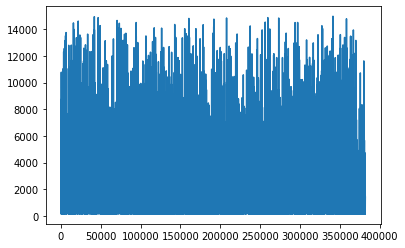

In [6]:
import matplotlib.pyplot as plt
import numpy as np

books_filter = list(filter(lambda x: len(x) < 15000,  books))
books_filter = list(filter(lambda x: len(x) > 150,  books_filter))
print(len(books_filter))

len_arr = [len(book) for book in books_filter]
print(np.mean(len_arr))

plt.plot(len_arr)
plt.show()

In [7]:
min_index = np.argmin(len_arr)
max_index = np.argmax(len_arr)
print(min_index, max_index)

4323 341408


In [11]:
print(books_filter[random.randint(1, len(books_filter))])

9788932016364 // 엔젤맨  [양장] // 디디에 레비 // 
초능력 인간은 누구에게나 선망과 부러움의 대상이다. 현실에선 불가능한 그야말로 초자연적인 일을 척척 해내니 누군들 부러운 눈초리를 보내지 않을 수 있을까. 게다가 그들은 한결같이 정의롭기까지 하다. 『엔젤맨』은 어른이든 아이든 누구나 맘속에 가지고 있는 초능력 인간에 대한 이야기다. 한창 왕성한 활동을 하면서 많은 팬을 가지고 있는 초능력 인간이 아니라 이제는 모든 사람들에게 잊혀져 쓸쓸한 노년을 보내는 초능력에 대한 인간 이야기.

아파트 맨 꼭대기 층에 사는 엔젤 씨는 어린 아르노 눈에 이상한 아저씨로밖에 안 보인다. 집에서 잘 나오지도 않고 사람들이랑 말도 별로 안 한다. 게다가 어쩌다 볼 때면 늘 파티복 같은 하얀 양복에 기다란 흰머리는 단정하게 빗질이 되어 있다. 도대체 무슨 일을 하는 사람인지 짐작이 안 된다. 그러나 비밀은 오래 가지 않는 법! 아르노에게 엔젤 씨에 대해 알아볼 수 있는 절호의 기회가 왔다. 혼자 낑낑대며 무거운 짐을 나르는 아저씨를 도와 아저씨네 집 앞까지 가게 된 것이다. 살짝 열린 문틈으로 들여다 본 세계. 아르노에게 새로운 세상과 친구를 만나게 해 줄 또 다른 문이 열리는 순간이다. 엔젤 씨네 집에는 신기한 것들이 가득하다. 꼬마 로봇 알피도 있고, 벽에는 날개옷을 입은 남자의 사진이랑 그림이 붙어 있다. 모든 게 어리둥절한 아르노에게 알피가 살짝 귀띔해 준다. “엔젤맨은 최초의 초능력 인간이었어.” 이제 아르노는 노인의 영광스러웠던 과거 속으로 빠져든다. 아르노는 오래 된 앨범을 들여다보며 한 시대를 주름잡았지만 지금은 망각 속에 빠져 버린 최초의 초능력 인간 엔젤맨의 활약상을 엿보게 된다. 하지만 그토록 많은 사람들에게 사랑을 받았던 엔젤맨도 판토맨과 플래시맨 또 무슨 무슨 맨이 나오면서 사람들에게 점점 잊혀져 가 자식 같은 로봇 알피와 아파트에서 조용히 지내고 있었던 것이다. ‘엔젤 맨’이 아니라 다른 사람들과 하나도 다를 게 없는 ‘엔젤 씨’가 

In [12]:
total_len = 0
for book in tqdm(books_filter, desc='Books : '):
    infos = book.split(' // ')
    content = infos[-1]
    total_len += len(content)
print('내용 텍스트 총 문자수 : ', total_len)
print('내용 텍스트 포함 문서수 : ', len(books_filter))

Books : 100%|██████████| 381977/381977 [00:00<00:00, 410004.87it/s]

내용 텍스트 총 문자수 :  599915173
내용 텍스트 포함 문서수 :  381977


In [14]:
with open('../book_crawling/도서_프리트레인_210603_02.dat', 'w', encoding='utf-8') as f:
    f.write('\n\n\n'.join(books[190001:]))

# 목차만 있는 데이터 따로 저장 (키워드 검색용)

In [357]:
with_table

,isbn,제목,저자,역자,별점,리뷰,카테고리,책소개,저자소개,추천사,목차,책속으로,출판사리뷰,판매지수,북소믈리에,출판일,출판사
0,9788942518999,전기안전공학,김두현 외,,,0 (반디앤루니스),"['대학교재 > 공학계열', '자연과학/공학 > 기술공학 > 전기/전자공학',...",,,,PART01 총론\n \nChapter1 안전공학의 개념 \nChapter2 전기적...,,,,,,
1,9788942518883,정역학,국승규,,,0 (반디앤루니스),"['자연과학/공학 > 기계/역학/항공공학 > 유체역학', '대학교재 > 공학계...",,,,제1장 서론 \n1.1 개요 \n1.2 기본개념 및 원리 \n1.3 단위계 \n1....,,,,,,
2,9788942518838,방제연공학,추병길 외,,,0 (반디앤루니스),"['자연과학/공학 > 기술공학 > 소방학 > 소방/방재이론', '대학교재 >...",,,,제1장 총론\n \n1.1 연기의 위험성 \n1.2 방제연개론 \n1.3 외국의 방...,,,,,,
3,9788942518890,Auto CAD 이해와 활용,"하헌우, 강찬석, 소수현 외",,,0 (반디앤루니스),"['대학교재 > 공학계열', '컴퓨터/IT', '컴퓨터/IT > 컴퓨터그래픽 ...",,,,CHAPTER 1. Auto CAD의 특징 및 설치 방법\n\nCHAPTER 2. ...,,,,,,
4,9788960098183,적성 캐스트 두산 DCAT 이공계,타임 적성검사연구소,,,0 (반디앤루니스),['대기업/공기업/면접 > 직무적성검사'],,,,PART 1 기초적성검사\n 01 언어논리성 \n02 수리자료분석 \n03 공...,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179227,9788992654159,ADHD 아동,김유숙 외,,,1 (반디앤루니스),"['대학교재', '인문/교양/철학 > 교육학 > 특수교육']",,"김유숙\n일본 도쿄(東京) 대학교 의학부에서 임상심리를 전공했으나, 한 개인을 둘러...",,서문\n\nPart 1 ADHD란 무엇인가\nPart 2 ADHD를 어떻게 다룰 것...,,,,,,이너북스
179228,9788994129013,붕어낚시 100문 1000답,낚시춘추편집부,,,0 (반디앤루니스),['여행/취미/레저 > 취미 > 낚시'],,,,목차\n위로\n \n \n\n \n제1장 붕어와 붕어낚시 붕어낚시의 정의와 기원 /...,,,,,,예조원
179229,9788994129136,루어낚시 첫걸음 - 바다편,조홍식,,,0 (반디앤루니스),['여행/취미/레저 > 취미 > 낚시'],,조홍식\n루어낚시인으로 유명한 이학박사이다. 서울 출신으로 경희대학교 및 동 대학원...,,1 첫걸음에 앞서 \n다이내믹한 바다 루어낚시의 매력 \n바다 루어낚시의 대상어종들...,,,,,,예조원
179230,9788994129068,월척 쉽게 낚는 책,허만갑,,,0 (반디앤루니스),['여행/취미/레저 > 취미 > 낚시'],,허만갑\n경상대학교 사회교육과 졸업. 사범대를 나왔으나 낚시가 좋아 교사의 길을 포...,,Part 1 왜 가장자리인가?-붕어의 먹이는 물가에 있다\nPart 2 최선의 낚시...,,,,,,예조원


In [358]:
with_table.to_csv('../book_crawling/목차만_BM25_210601.csv', encoding='utf-8-sig')